# STAT207 Mini-Project #2 - Predicting Car Prices


Allison Prabakar


In [525]:
#Imports here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


## 1. Introduction

The primary goal of this project is to build a predictive model that will effectively predict car prices for new datasets. To achieve this, we will use five explanatory variables: engine size, horsepower, highway MPG, curb weight, and fueltype. 

Beyond predictions, our secondary research goal is to interpret the relationships between these explanatory variables and car price. By analyzing these relationships, we aim to gain insights into how different vehicle characteristics impact pricing trends.

This model will be particularly useful for car dealerships. Dealerships rely on accurate pricing to remain competitive in the market. By using this model, they can estimate the value of cars based on the variables we are considering, helping them set optimal selling prices. Additionally, it can assist in pricing trade-ins more effectively and identifying which car features drive higher sale values, allowing them to make better purchasing and selling decisions.

## 2. Dataset Discussion

In [497]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [498]:
df.shape[0]

205

The dataset I chose for this project is Car Price Prediction that I found on Kaggle and this is the link https://www.kaggle.com/datasets/hellbuoy/car-price-prediction. This dataset has 205 rows before any cleaning. I downloaded this csv file on March 20th, 2025.

In [499]:
df_ = df[["price", "enginesize", "horsepower", "highwaympg", "curbweight", 'fueltype']]
df_

,price,enginesize,horsepower,highwaympg,curbweight,fueltype
0,13495.0,130,111,27,2548,gas
1,16500.0,130,111,27,2548,gas
2,16500.0,152,154,26,2823,gas
3,13950.0,109,102,30,2337,gas
4,17450.0,136,115,22,2824,gas
...,...,...,...,...,...,...
200,16845.0,141,114,28,2952,gas
201,19045.0,141,160,25,3049,gas
202,21485.0,173,134,23,3012,gas
203,22470.0,145,106,27,3217,diesel


I filtered the dataset to focus on the 5 numerical variables and 1 categorical variable I am considering in this analysis. 

## 3. Dataset Cleaning

To ensure I get accurate results, I will take several steps to ensure my dataset is cleaned. I will check for NA values, make sure each variable has data of the expected type, and check for outliers. We need to consider NA values because they could hinder our modeling results and affect interpretability.

In [500]:
df_.isna().sum()

price         0
enginesize    0
horsepower    0
highwaympg    0
curbweight    0
fueltype      0
dtype: int64

In [501]:
df_.dtypes

price         float64
enginesize      int64
horsepower      int64
highwaympg      int64
curbweight      int64
fueltype       object
dtype: object

In [502]:
df_['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

After analyzing the types and specifically the values in 'fueltype' since it's of type object, I see no NA values so I will not drop any rows.

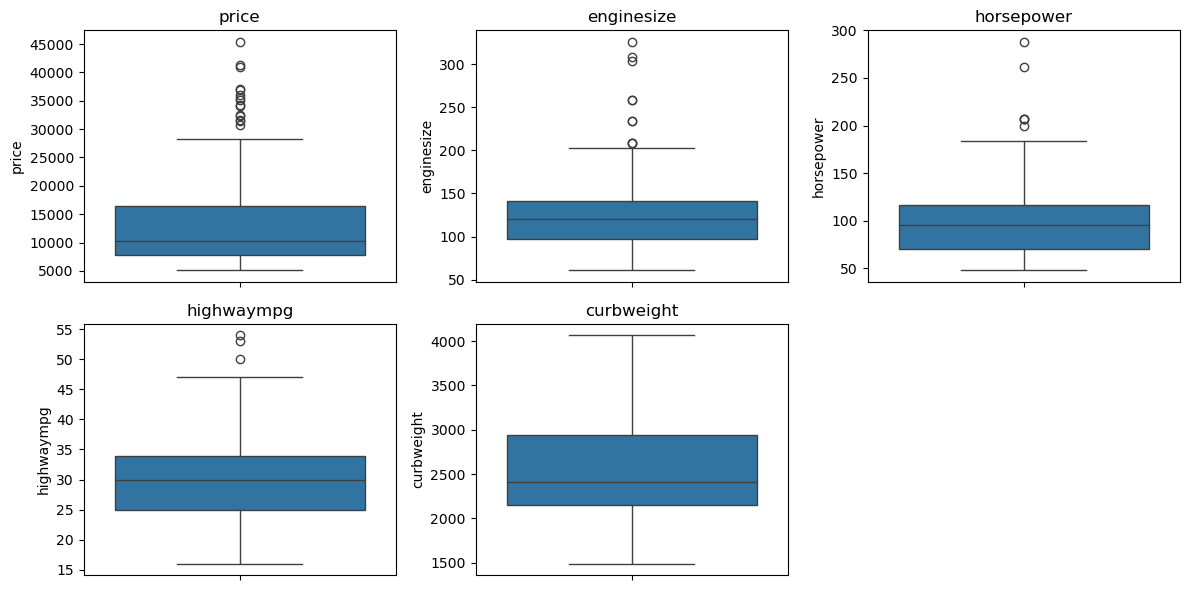

In [526]:
numerical_features = ["price", "enginesize", "horsepower", "highwaympg", "curbweight"]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

## Outlier Analysis

I displayed the boxplots to analyze the outliers. As seen in the boxplots, there are high outliers. I have decided to keep the high price values because this represents more luxury, expensive cars which are important to our analysis of predicting price. I did try removing some of the high outliers but was getting stronger results (higher test R^2) when I kept them. 

## 4. Preliminary Analysis

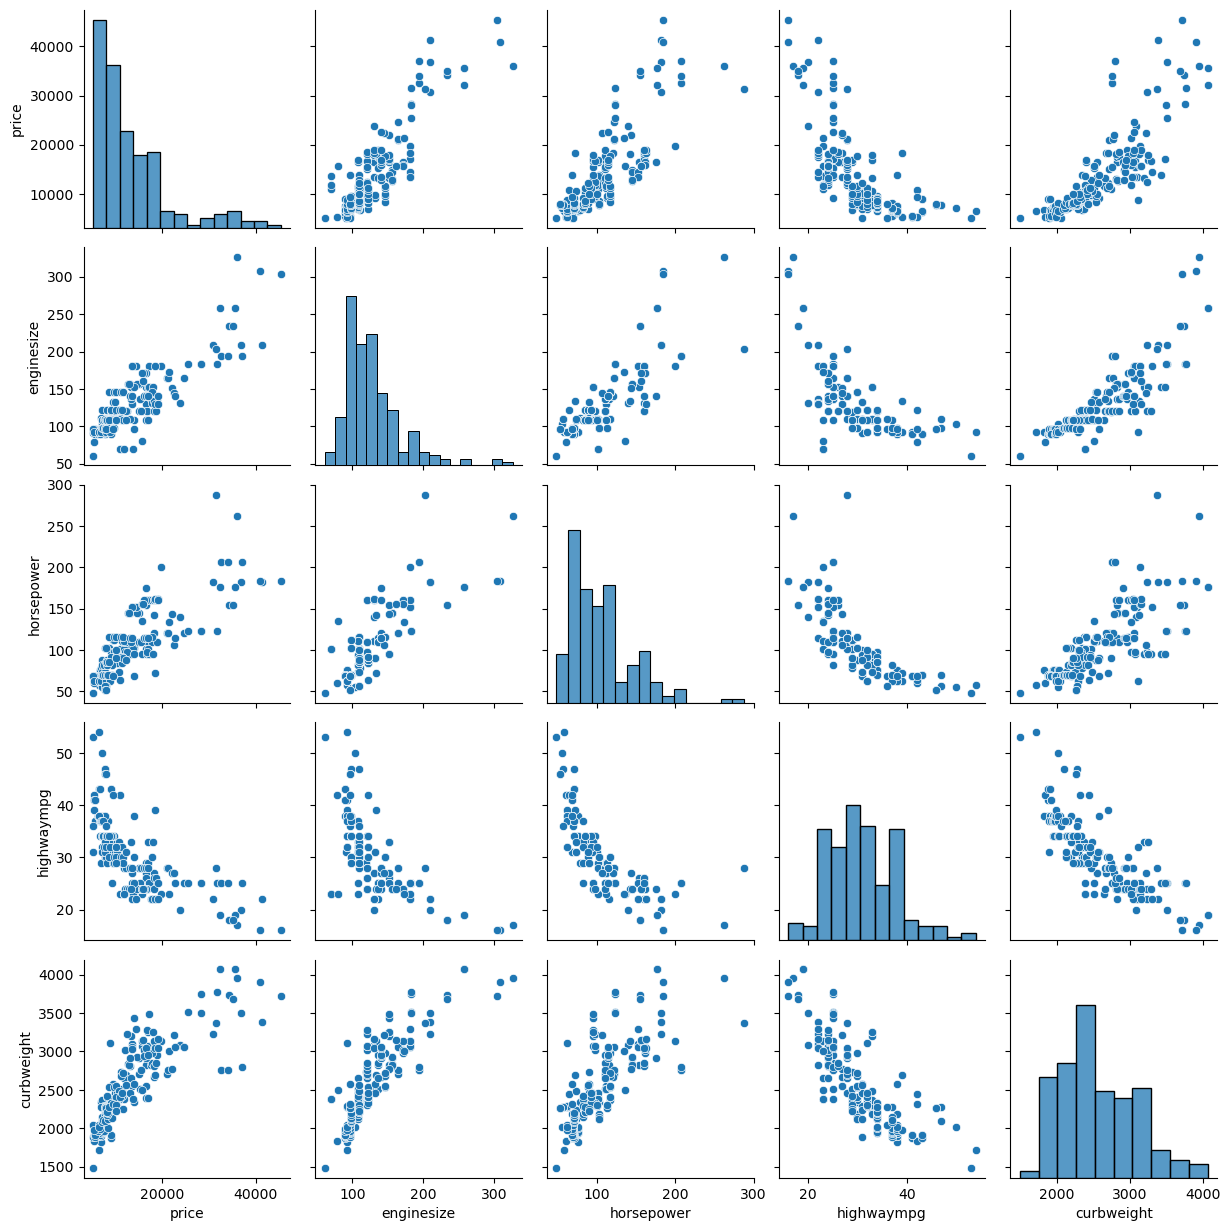

In [504]:
sns.pairplot(df_)

In [505]:
correlation_matrix = df_.select_dtypes(include=['number']).corr()
correlation_matrix

,price,enginesize,horsepower,highwaympg,curbweight
price,1.000000,0.874145,0.808139,-0.697599,0.835305
enginesize,0.874145,1.000000,0.809769,-0.677470,0.850594
horsepower,0.808139,0.809769,1.000000,-0.770544,0.750739
highwaympg,-0.697599,-0.677470,-0.770544,1.000000,-0.797465
curbweight,0.835305,0.850594,0.750739,-0.797465,1.000000


In [506]:
import statsmodels.formula.api as smf
full_model = smf.ols(formula = 'price~enginesize+horsepower+highwaympg+curbweight+fueltype', data = df_).fit()
full_model

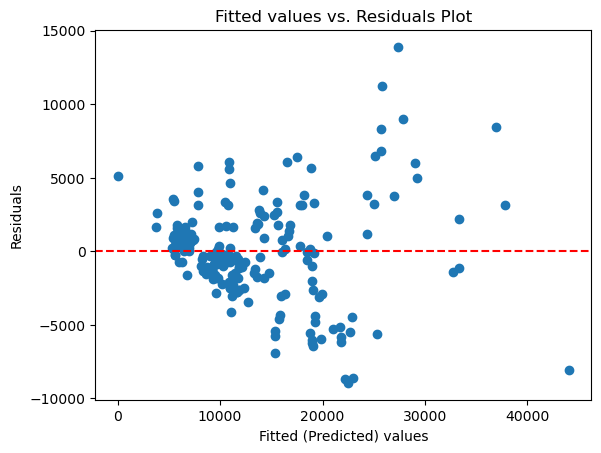

In [507]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted (Predicted) values")
plt.ylabel("Residuals")
plt.title("Fitted values vs. Residuals Plot")
plt.show()

In [523]:
df_.loc[:, 'ln_price'] = np.log(df_['price'])
df_.loc[:, 'ln_enginesize'] = np.log(df_['enginesize'])
df_.loc[:, 'ln_horsepower'] = np.log(df_['horsepower'])

I have reason to believe that price, enginesize, and horsepower would benefit from being log transformed. This is because from the pairplot visual, these variables are skewed right and potentially could be causing the linearity assumption to not be met.

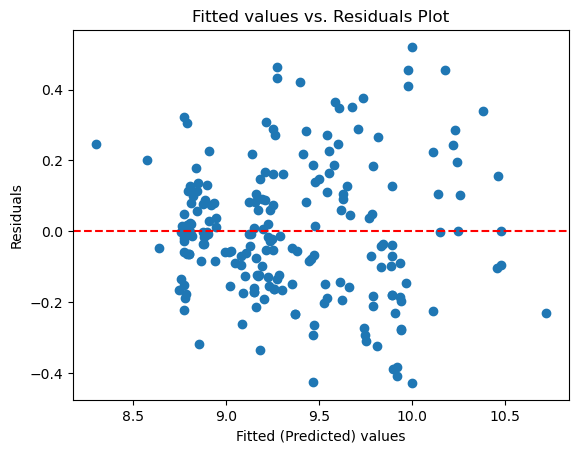

In [509]:

log_model = smf.ols(formula = 'ln_price~ln_enginesize+ln_horsepower+highwaympg+curbweight+fueltype', data = df_).fit()
log_model
plt.scatter(log_model.fittedvalues, log_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted (Predicted) values")
plt.ylabel("Residuals")
plt.title("Fitted values vs. Residuals Plot")
plt.show()

## Linearity Assumption

Overall, transforming these variables made our residual plot have more of an even distribution of positive and negative residuals in the small width boxes (if we were to draw them). Thus, we will keep these transformed variables for the rest of our analysis since the linearity assumption is more closely met.

## Interaction Terms

I will now consider if there are any interaction terms between the numerical and categorical explanatory variables. I will do this by creating a scatterplot with each numerical expanatory vs. price, and how they differ based on the 2 different fueltypes (gas or diesel).

<Figure size 800x600 with 0 Axes>

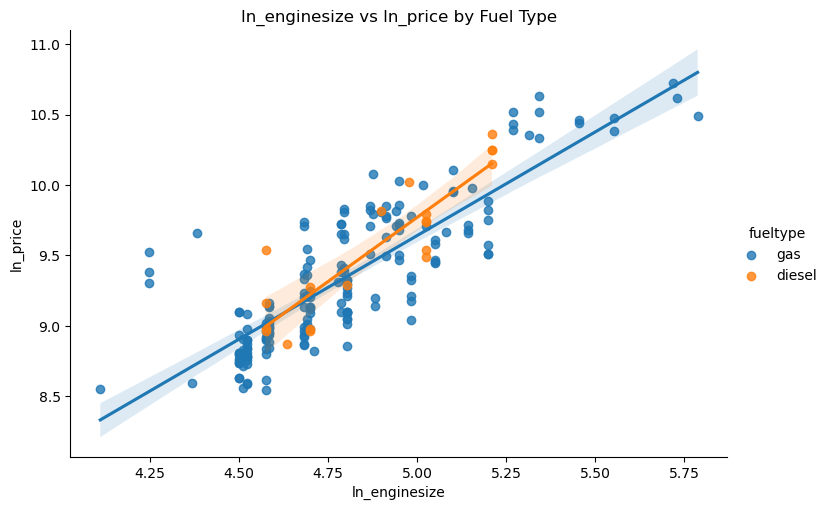

<Figure size 800x600 with 0 Axes>

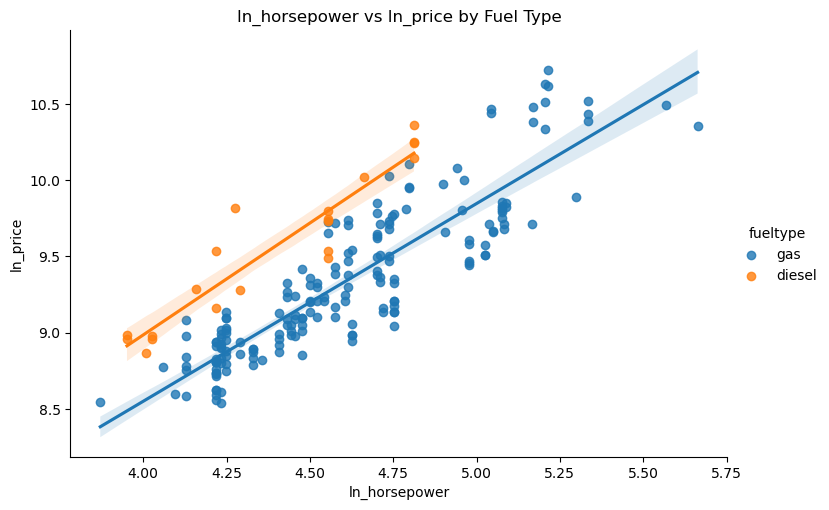

<Figure size 800x600 with 0 Axes>

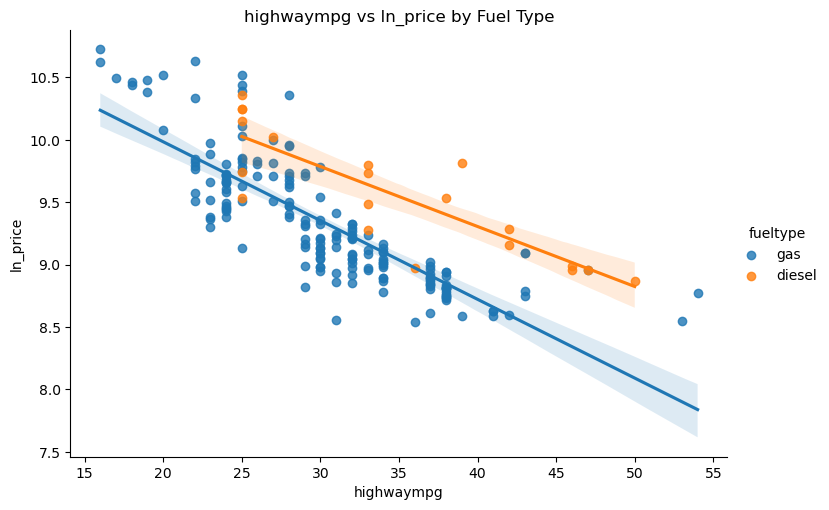

<Figure size 800x600 with 0 Axes>

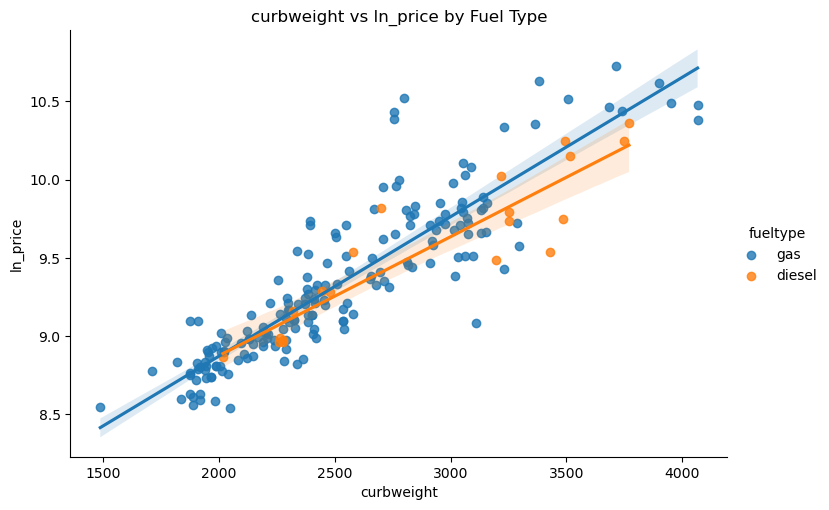

In [510]:
import seaborn as sns
import matplotlib.pyplot as plt

num_vars = ['ln_enginesize', 'ln_horsepower', 'highwaympg', 'curbweight']

for var in num_vars:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=df_, x=var, y='ln_price', hue='fueltype', aspect=1.5)
    plt.title(f'{var} vs ln_price by Fuel Type')
    plt.show()

Of all the pairings between each numerical explanatory with the categorical variable, the largest interactions are see with horsepower vs price and enginesize vs price. The slopes of the best fit lines in these plots are the most different, indicating an interaction as fueltype differs. 

## 5. Predictive Models

## Train-Test Split

In [511]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_, test_size=0.2, random_state=207)

## Features Matrix and Target Array

In [512]:
X_train=df_train.drop(['price'], axis=1)
X_test=df_test.drop(['price'], axis=1)
y_train=df_train['price']
y_test=df_test['price']


## 5.1 Non Regularized Linear Regression Model

The first model we will look at is a non-regularized linear regression model using all 5 explanatory variables. First we need to z-score scale our numerical explanatory variables so we will be able to interpret the magnitude of our slopes for all our models. 

In [513]:

# Numerical and categorical features
num_vars = ["ln_enginesize", "ln_horsepower", "highwaympg", "curbweight"]
cat_var = "fueltype"

df_train = pd.get_dummies(df_train, columns=[cat_var], drop_first=True)
df_test = pd.get_dummies(df_test, columns=[cat_var], drop_first=True)

missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0
df_test = df_test[df_train.columns]

#Scaling

scaler = StandardScaler()

df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

df_train_scaled[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test_scaled[num_vars] = scaler.transform(df_test[num_vars])

#Fitting the Linear Regression Model

model = smf.ols(formula="ln_price ~ ln_enginesize + ln_horsepower + highwaympg + curbweight + fueltype_gas", data=df_train_scaled).fit()

y_test = df_test_scaled["ln_price"]
y_pred = model.predict(df_test_scaled)

test_r2 = r2_score(y_test, y_pred)

print(f"\nTest R^2: {test_r2:.4f}")


Test R^2: 0.8307


## 5.2 Non Regularized Linear Regression Model with Interaction Terms

Now, we will add in our interaction terms which are ln_enginesize * fueltype and ln_horsepower * fueltype and fit a non-regularized linear regression model.

In [527]:


model_5_2 = smf.ols(formula="""
ln_price ~ ln_enginesize + ln_horsepower + highwaympg + curbweight + fueltype_gas
         + ln_enginesize:fueltype_gas + ln_horsepower:fueltype_gas
""", data=df_train_scaled).fit()


y_test = df_test_scaled["ln_price"]
y_pred_5_2 = model_5_2.predict(df_test_scaled)


test_r2_5_2 = r2_score(y_test, y_pred_5_2)

print(f"\nTest R² for 5.2: {test_r2_5_2:.4f}")


Test R² for 5.2: 0.8311


## 5.3 Feature Selection : Backward Elimination

The type of feature selection I will be performing is backward elimination to try and find the linear regression model with the highest possible test R^2 value. I will have 5 different models each with one of the explanatory variables removed.

In [515]:
full_model = smf.ols(formula="ln_price ~ ln_enginesize + ln_horsepower + highwaympg + curbweight + fueltype_gas", data=df_train_scaled).fit()



y_test = df_test_scaled["ln_price"]
y_pred = model.predict(df_test_scaled)

test_r2 = r2_score(y_test, y_pred)

print(f"\nTest R²: {test_r2:.4f}")


Test R²: 0.8307


In [516]:
#remove enginesize

engine_model = smf.ols(formula="ln_price ~ ln_horsepower + highwaympg + curbweight + fueltype_gas", data=df_train_scaled).fit()



y_test = df_test_scaled["ln_price"]
y_pred = engine_model.predict(df_test_scaled)

test_r2 = r2_score(y_test, y_pred)

print(f"\nTest R²: {test_r2:.4f}")


Test R²: 0.8281


In [517]:
#remove horsepower

horsepower_model = smf.ols(formula="ln_price ~ ln_enginesize + highwaympg + curbweight + fueltype_gas", data=df_train_scaled).fit()



y_test = df_test_scaled["ln_price"]
y_pred = horsepower_model.predict(df_test_scaled)

test_r2 = r2_score(y_test, y_pred)

print(f"\nTest R²: {test_r2:.4f}")



Test R²: 0.7716


In [518]:
#remove highwaympg
highwaympg_model = smf.ols(formula="ln_price ~ ln_enginesize + ln_horsepower + curbweight + fueltype_gas", data=df_train_scaled).fit()


y_test = df_test_scaled["ln_price"]
y_pred = highwaympg_model.predict(df_test_scaled)

test_r2 = r2_score(y_test, y_pred)

print(f"\nTest R²: {test_r2:.4f}")


Test R²: 0.8314


In [519]:
#remove curbweight
curbweight_model = smf.ols(formula="ln_price ~ ln_enginesize + ln_horsepower + highwaympg + fueltype_gas", data=df_train_scaled).fit()



y_test = df_test_scaled["ln_price"]
y_pred = curbweight_model.predict(df_test_scaled)

test_r2 = r2_score(y_test, y_pred)

print(f"\nTest R²: {test_r2:.4f}")


Test R²: 0.8212


In [520]:
#remove fueltype
fueltype_model = smf.ols(formula="ln_price ~ ln_enginesize + ln_horsepower + highwaympg + curbweight ", data=df_train_scaled).fit()



y_test = df_test_scaled["ln_price"]
y_pred = fueltype_model.predict(df_test_scaled)

test_r2 = r2_score(y_test, y_pred)

print(f"\nTest R²: {test_r2:.4f}")


Test R²: 0.8188


The model with highwaympg removed resulted in the highest test R^2, of 0.8314.

## 6. Best Model Discussion

In [521]:
best_model = smf.ols(formula="ln_price ~ ln_enginesize + ln_horsepower + curbweight + fueltype_gas", data=df_train_scaled).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     252.1
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.04e-67
Time:                        16:23:33   Log-Likelihood:                 45.195
No. Observations:                 164   AIC:                            -80.39
Df Residuals:                     159   BIC:                            -64.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.5244      0.058    163.775      0.000       9.410       9.639
fueltype_gas[T.True]    -0.1707      0.063     -2.717      0.007      -0.295      -0.047
ln_enginesize            0.0080      0.033      0.239      0.812      -0.058       0.074
ln_horsepower            0.2109      0.031      6.736      0.000       0.149       0.273
curbweight               0.2617      0.038      6.968      0.000       0.188       0.336
==============================================================================
Omnibus:                        7.012   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.834
Skew:                           0.494   Prob(JB):                       0.0328
Kurtosis:                       3.159   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Equation

$\hat{price}$ = 9.5244−0.1707⋅fueltype_gas+0.0080⋅ln_enginesize+0.2109⋅ln_horsepower+0.2617⋅curbweight


## Checking for Multi-Collineairty

In [522]:
df_[['ln_horsepower','ln_enginesize', 'curbweight']].corr()

,ln_horsepower,ln_enginesize,curbweight
ln_horsepower,1.000000,0.813047,0.780278
ln_enginesize,0.813047,1.000000,0.874265
curbweight,0.780278,0.874265,1.000000


The best model was from the backward elimination where highwaympg was removed because it had the highest test R^2 of 0.8314 compared to the non-regularized linear-regression model which was 0.8307 and the non-regularized with interaction terms which was 0.8311. The overall fit of the best model is pretty good since the test R^2 is relativiely close to 1, and R^2 is a fit metric. Since the best model from backward feature selection was when highwaympg was removed, this suggests that highwaympg was overfitting the model. There is multicollinearity issues with the remaining explanatory variables because they all have a correlation greater than 0.7 with each other, which may lead to misleading slope interpretations. Because I scaled my numerical explanatory variables, the absolute values of the slopes can be used to determine which explanatory variables are most important in predicting the response variable. Based on the magnitudes of the coefficients, curbweight (0.2617) is the most important predictor, followed by ln_horsepower (0.2109) and fuel type (0.1707). Ln_enginesize (0.0080) is the least important, with little to no impact.

## 7. Conclusion

The relationship between car price and its explanatory variables changes depending on the specific characteristics of the vehicle. In our best model from backward linear regression with highway MPG removed, we found that curb weight had the strongest impact on car price, followed by horsepower and fuel type, while engine size had a minimal effect. This suggests that heavier and more powerful cars tend to have higher prices, with fuel type also playing a role. However, the effect of these variables may vary depending on other factors in the dataset, such as the specific range of horsepower or weight values, which could have potential interaction effects that I didn't explicitly model. Given the relatively strong predictive power of this model, I would recommend it for use by car dealerships, as it provides valuable insights into pricing trends and can help with buying and selling strategies. A shortcoming is I did not explore Lasso or Elastic Net regression, which could have resulted in better feature selection and model performance by handling multicollinearity and preventing overfitting. Additionally, I'm not certain this model achieves the highest possible test R^2
  among all potential models, as other regression techniques or interaction terms might improve predictive accuracy. A more comprehensive analysis could include testing different feature selection methods or including additional variables that may influence price. One potential area for future work is exploring non-linear relationships between variables or incorporating external factors like economic conditions to improve the model’s real-world applications. 